# EDA - Student Performance Data Analysis

### Importing all the necessary libraries


In [ ]:
# Here write your code

### import dataset `student.csv` data from dataset directory

In [ ]:
# Here write your code

### Display the first five rows of the dataframe

In [ ]:
# Here write your code

- There are 5 categorical features in our dataset, out of these 5 only parental level of education is ordinal rest 4 gender,race/ethnicity,lunch,test prepration course are nominal
- Math Score,reading score and write score are numerical continuous features or columns.

### last 5 rows


In [1]:
# Here wtite your code

### shape of data

In [ ]:
# Here wtite your code

### get data information


In [ ]:
# Here wtite your code

### check datatypes of columns

In [ ]:
# Here wtite your code

### Segregating the data: Separate numerical and categorical columns

In [2]:
# Here wtite your code

### check data memory

In [ ]:
# Here wtite your code

#### check missing values

In [3]:
# Here wtite your code

> There is no null value.

#### check duplicate values

In [4]:
# Here wtite your code

> There are no duplicate values.

#### Check Unique values

In [5]:
# Here wtite your code

### stats related to columns

In [ ]:
# Here wtite your code

### check correlation

In [6]:
# Here wtite your code

> If we are good reader then we are good writer as there is +ve correlation b/w reading and writing scores.

### check covariance

In [7]:
# Here wtite your code

### Check skewness of the data

In [ ]:
# Here wtite your code

> Our data is left skewed.

<AxesSubplot: xlabel='math score', ylabel='Density'>

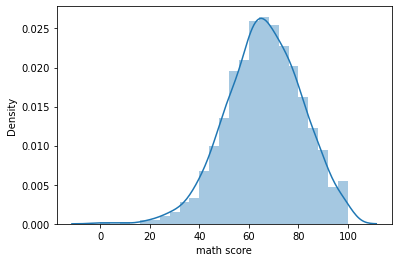

In [32]:
sns.distplot(data['math score'])

### Create a new column `avg_score` by adding three columns `math score`, `reading score`, `writing score`

In [8]:
# Here wtite your code

Now our dataset looks like this

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [45]:
data.groupby('gender').mean()

,math score,reading score,writing score,average score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


On an average Females score more marks than males

In [46]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [44]:
data.groupby('race/ethnicity').mean()

,math score,reading score,writing score,average score
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


### Find number of students with less than 30marks in maths

In [9]:
# Here wtite your code

In [52]:
### pvalue
### p > 0.05 then data is normally distributed

In [53]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average score'],
      dtype='object')

In [55]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [56]:
### check normality of the data
data_num = data[num_col]

In [58]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [59]:
##check normality of the data

from scipy.stats import normaltest

normaltest(data_num['math score'])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

AS p-value is less than 0.05 so the math score is not normally distributed.

In [62]:
normaltest(data_num['math score'])[1]*100

0.04508029386993784

data is little skewed

<AxesSubplot: xlabel='math score', ylabel='Density'>

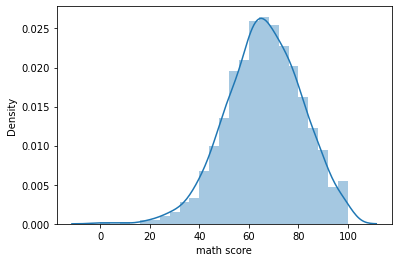

In [61]:
sns.distplot(data_num['math score'])

In [60]:
normaltest(data_num)

NormaltestResult(statistic=array([15.40896051, 11.1174128 , 13.60645084]), pvalue=array([0.0004508 , 0.00385376, 0.00111019]))

#### Outliers

IQR = Q3 - Q1<br>
Upper limit = Q3 + 1.5*IQR<br>
Lower limit = Q1 - 1.5*IQR

<AxesSubplot: >

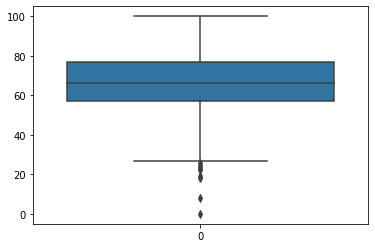

In [63]:
### boxplot
sns.boxplot(data = data['math score'])

In [64]:
num_col

['math score', 'reading score', 'writing score']

<AxesSubplot: >

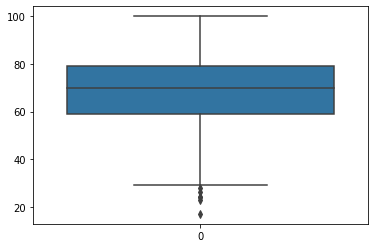

In [68]:
sns.boxplot(data = data['reading score'])

<AxesSubplot: >

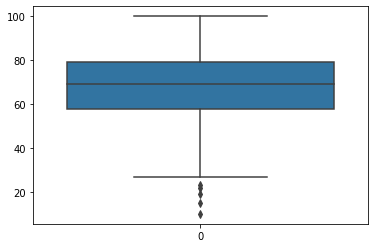

In [69]:
sns.boxplot(data = data['writing score'])

In [78]:
q1 = data['math score'].quantile(0.10)

In [79]:
q3 = data['math score'].quantile(0.90)

In [80]:
IQR = q3-q1

In [82]:
upper_limit = q3 + (1.5*IQR)

In [83]:
lower_limit = q1 - (1.5*IQR)

In [84]:
upper_limit

144.5

In [85]:
lower_limit

-11.5

In [87]:
data[data['math score']<lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score


In [88]:
data[data['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score


In [73]:
data['math score'].min()

0

In [74]:
data['math score'].max()

100

In [76]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [77]:
data['math score'].quantile(1.00)

100.0

In [89]:
q1 = data['math score'].quantile(0.25)

In [90]:
q3 = data['math score'].quantile(0.75)

In [91]:
IQR = q3-q1

In [92]:
upper_limit = q3 + (1.5*IQR)

In [93]:
lower_limit = q1 - (1.5*IQR)

In [94]:
upper_limit

107.0

In [95]:
lower_limit

27.0

In [98]:
data[data['math score'] < lower_limit] ##outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [97]:
data[data['math score'] > upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score


In [101]:
drop_ind = data[data['math score'] < lower_limit].index

In [102]:
drop_ind

Int64Index([17, 59, 145, 338, 466, 787, 842, 980], dtype='int64')

In [105]:
data.drop(labels=drop_ind,axis=0,inplace=True)
data.shape

(992, 9)

In [106]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333
999,female,group D,some college,free/reduced,none,77,86,86,83.000000


In [107]:
## OR
## use a function to remove outliers

def get_iqr(data,column_name,q1_range,q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3-q1
    upper_fence = q3 + (1.5*IQR)
    lower_fence = q1 - (1.5*IQR)
    return IQR,upper_fence,lower_fence

In [115]:
### OR
def outlier_threshold(df,variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    IQR = q3-q1
    upper_fence = q3 + (1.5*IQR)
    lower_fence = q1 - (1.5*IQR)
    return upper_fence,lower_fence

In [116]:
data_num.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [117]:
for i in data_num.columns:
    upper_limit,lower_limit = outlier_threshold(data,i)

In [119]:
upper_limit

110.5

In [120]:
lower_limit

26.5

In [121]:
def replace_with_threshold(data,numeric_col):
    for i in numeric_col:
        upper_limit,lower_limit = outlier_threshold(data,i)
        data.loc[data[i]<lower_limit,i] = lower_limit
        data.loc[data[i]>upper_limit,i] = upper_limit

In [ ]:
replace_with_threshold(data_num,data_num.columns)

#### Graph Analysis

In [128]:
data['gender'].value_counts()

female    510
male      482
Name: gender, dtype: int64

<AxesSubplot: xlabel='gender', ylabel='count'>

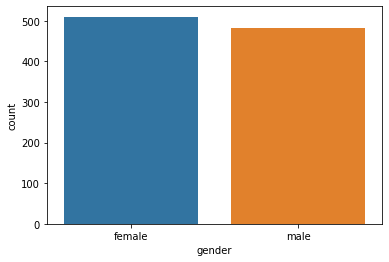

In [130]:
sns.countplot(data,x='gender')

<AxesSubplot: xlabel='race/ethnicity', ylabel='count'>

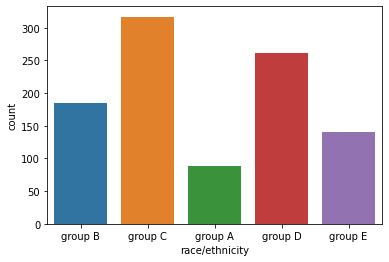

In [132]:
sns.countplot(data,x='race/ethnicity')

In [135]:
df = data.groupby('gender').mean()
df

,math score,reading score,writing score,average score
gender,,,,
female,64.356863,73.231373,73.158824,70.249020
male,68.728216,65.473029,63.311203,65.837483


In [136]:
df['average score']

gender
female    70.249020
male      65.837483
Name: average score, dtype: float64

In [138]:
df['average score'][0] ###female average score

70.24901960784314

In [139]:
df['average score'][1] ### average male socre

65.8374827109267

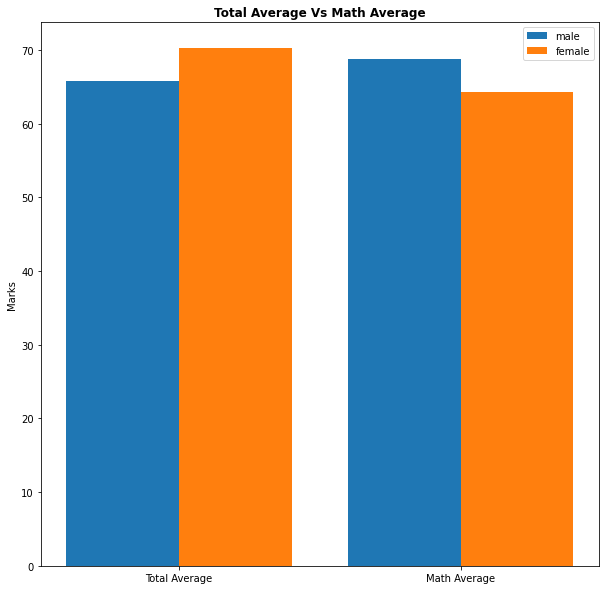

In [141]:
###avg vs math score

plt.figure(figsize=(10,10))
x = ['Total Average', 'Math Average']
female_score = df['average score'][0],df['math score'][0]
male_score = df['average score'][1],df['math score'][1]
X_axis = np.arange(len(x))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2, female_score,0.4,label='female')

plt.xticks(X_axis,x)
plt.ylabel("Marks")
plt.title("Total Average Vs Math Average",fontweight='bold')
plt.legend()
plt.show()

In [146]:
data_num.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot: >

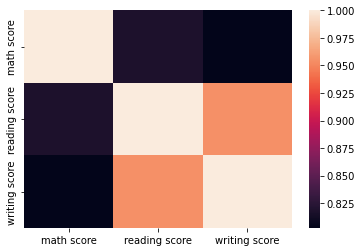

In [147]:
### heat map to find the correlation 

sns.heatmap(data_num.corr())

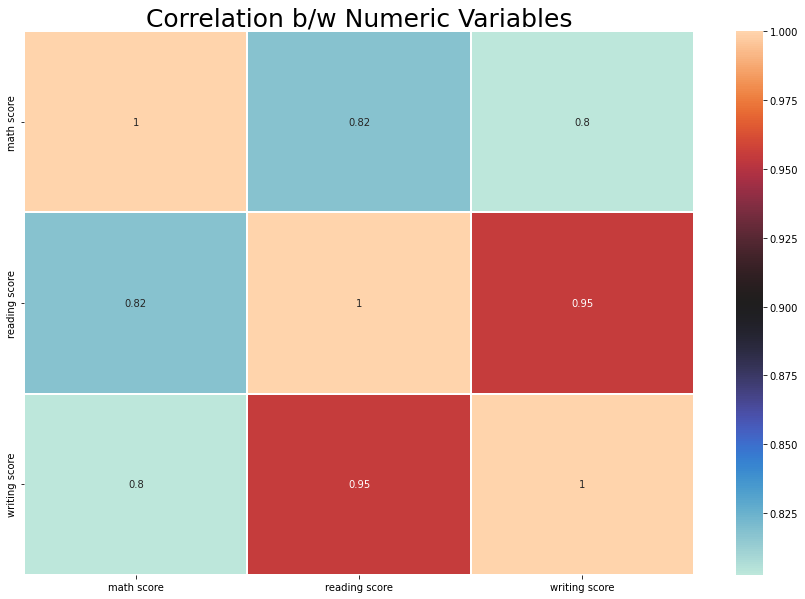

In [148]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title("Correlation b/w Numeric Variables",color='black',size=25)
plt.show()

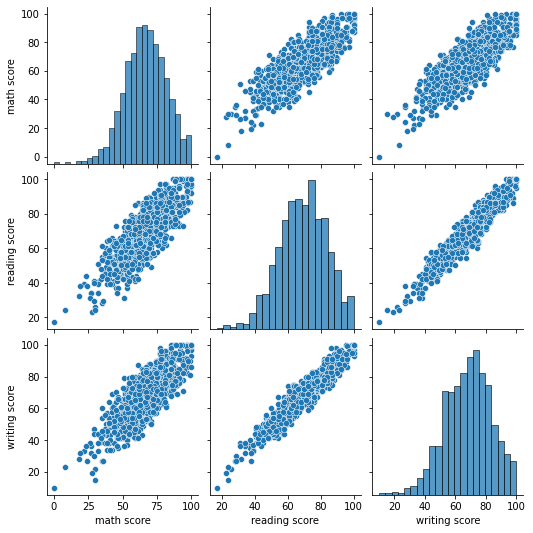

In [145]:
sns.pairplot(data_num)

In [10]:
sns.violinplot(data = data_num, x=data_num['math score'], y=data_num['writing score'])

NameError: name 'sns' is not defined

<AxesSubplot: >

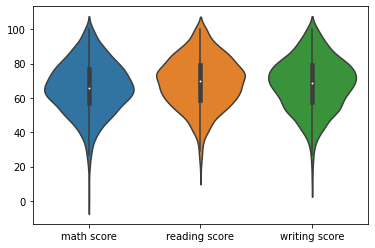

In [150]:
sns.violinplot(data=data_num)